# Laboratorio 4

- [Mónica Salvatierra - 22249](https://github.com/alee2602)
- [Paula Barillas - 22764](https://github.com/paulabaal12)
- [Derek Arreaga - 22537](https://github.com/FabianKel)

#####  LINK DE REPOSITORIO
https://github.com/FabianKel/LAB4-IA

## Task 1 - Preguntas Teóricas

1. Explique con sus propias palabras, qué son los grafos computaciones y cuál es su importancia para el
cálculo de gradientes en aplicaciones como backpropagation

Gráfico acíclico dirigido, para representar la expresión matemática final y cada nodo representa subexpresiones intermedias.

* Ayuda a simplificar el proceso
* Ayuda a obtener más información de la naturaleza y estructura modular de los cálculos de gradientes

2. Detalle cuales son los componentes y pasos que conforman una red neuronal. Con esto en mente, ¿cómo
mejoraría el perceptrón que hizo en el laboratorio pasado?

**Componentes:**
* a

3. Investigue y explique cómo se selecciona el valor K usando el método de la silueta para el algoritmo de K-
Means. Explique las fórmulas (ecuaciones) que lo componen así como las asumpciones, si hay.

El método de la silueta ayuda a determinar el número óptimo de clusters (K) en K-means evaluando la calidad de la agrupación. Se basa en dos medidas:

1. **Cohesión (a)**: Representando el promedio de la distancia entre un punto y todos los demás puntos dentro de su mismo cluster
2. **Separación (b)**: Representa el promedio de la distancia entre un punto y todos los puntos del cluster más cercano

La fórmula para el coeficiente de silueta es:
  $$ s(i) = \frac{b(i) - a(i)}{max(a(i), b(i))}   $$ 

Donde:
- s(i) es el coeficiente de silueta para el punto i
- a(i) es la cohesión
- b(i) es la separación

Si el coeficiente varía entre -1 y 1:
- Valores cercanos a 1 indican buena agrupación
- Valores cercanos a 0 indican solapamiento
- Valores negativos indican mala asignación

Asumpciones:
- Los clusters están bien separados
- Los datos tienen una estructura de agrupamiento natural
- La distancia es una medida significativa de similitud

4. Investigue sobre Principal Component Analysis (PCA) y responda respecto a algoritmos como K-Means:
a. ¿Cómo podría ayudarle a mejorar la calidad de sus clusters cuando se usa K-Means?

- Reduciendo la dimensionalidad de los datos conservando la información más relevante/importante

- Mejora la visualización al proyectar los datos en 2 o 3 dimensiones principales, facilitando la interpretación de los clusters


#### Referencias:
- Improve, A. 27 F. (2018, julio 7). Principal component analysis(PCA). GeeksforGeeks. https://www.geeksforgeeks.org/principal-component-analysis-pca/

- Jaadi, Z. (2021, abril 1). Principal Component Analysis (PCA): A step-by-step explanation. Built In. https://builtin.com/data-science/step-step-explanation-principal-component-analysis

- Ramirez, J. (2018, diciembre 25). K-means: Elbow method and silhouette - Jonathan Ramirez. Medium. https://medium.com/@jonathanrmzg/k-means-elbow-method-and-silhouette-e565d7ab87aa

## Task 2 - Ejercicios Prácticos

### Task 2.1 - K-Means y Segmentación de Clientes de Banco

### **Importar las librerías a utilizar**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
%matplotlib inline


### **Leer archivo de datos**

In [2]:
data = pd.read_csv("bank_transactions.csv")

### **Obtener las primeros 15 datos**

In [3]:
data.head(15)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


### **Exploración de datos**

In [5]:
data.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


### **Seleccionar solo las variables relevantes**

In [6]:
selected_features = ['CustomerDOB', 'CustGender', 'CustAccountBalance', 'TransactionAmount (INR)']
features = data[selected_features]

### **Revisar si hay valores faltantes**

In [7]:
features.isnull().sum()

CustomerDOB                3397
CustGender                 1100
CustAccountBalance         2369
TransactionAmount (INR)       0
dtype: int64

### **Eliminar valores faltantes**

In [8]:
features = features.dropna()

### **Revisar la cantidad de registros en las features seleccionadas**

In [9]:
features.count()

CustomerDOB                1041765
CustGender                 1041765
CustAccountBalance         1041765
TransactionAmount (INR)    1041765
dtype: int64

In [10]:
features.head()

,CustomerDOB,CustGender,CustAccountBalance,TransactionAmount (INR)
0,10/1/94,F,17819.05,25.0
1,4/4/57,M,2270.69,27999.0
2,26/11/96,F,17874.44,459.0
3,14/9/73,F,866503.21,2060.0
4,24/3/88,F,6714.43,1762.5


## **Encoding y transformación de variables**

### **Convertir CustomerDOB a Age**

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime

current_year = datetime.now().year
features['CustomerDOB'] = pd.to_datetime(features['CustomerDOB'], format='%d/%m/%y', errors='coerce')
features['Age'] = current_year - features['CustomerDOB'].dt.year
features.loc[features['Age'] < 0, 'Age'] += 100

In [12]:
features.drop(columns=['CustomerDOB'], inplace=True, errors='ignore')

In [13]:

encoder = LabelEncoder()
features['CustGender'] = features['CustGender'].map({'M': 0, 'F': 1})  

In [14]:
features.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),Age
0,1.0,17819.05,25.0,31.0
1,0.0,2270.69,27999.0,68.0
2,1.0,17874.44,459.0,29.0
3,1.0,866503.21,2060.0,52.0
4,1.0,6714.43,1762.5,37.0


In [15]:
features.describe()

,CustGender,CustAccountBalance,TransactionAmount (INR),Age
count,1.041764e+06,1.041765e+06,1.041765e+06,985473.000000
mean,2.694142e-01,1.149952e+05,1.566102e+03,40.025744
std,4.436557e-01,8.467011e+05,6.561101e+03,8.749705
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,4.726860e+03,1.600000e+02,34.000000
50%,0.000000e+00,1.676953e+04,4.575000e+02,38.000000
75%,1.000000e+00,5.743646e+04,1.200000e+03,43.000000
max,1.000000e+00,1.150355e+08,1.560035e+06,99.000000


### **Verificar si las clases están balanceadas**

In [16]:
features["CustGender"].value_counts()


CustGender
0.0    761098
1.0    280666
Name: count, dtype: int64

In [17]:

df_majority = features[features["CustGender"] == 0]  # Hombres (clase mayoritaria)
df_minority = features[features["CustGender"] == 1]  # Mujeres (clase minoritaria)

# Seleccionar una muestra de la clase mayoritaria con el mismo tamaño que la minoritaria
df_majority_sample = df_majority.sample(n=len(df_minority), random_state=13)

# Combinar ambas clases 
df_balanced = pd.concat([df_majority_sample, df_minority])

df_balanced["CustGender"].value_counts()

CustGender
0.0    280666
1.0    280666
Name: count, dtype: int64

### **Escalar los datos**


In [18]:
numeric_features = ['CustAccountBalance', 'TransactionAmount (INR)', 'Age']
scaler = StandardScaler()

df_balanced_scaled = df_balanced.copy()
df_balanced_scaled[numeric_features] = scaler.fit_transform(df_balanced_scaled[numeric_features])

df_balanced_scaled.head()

,CustGender,CustAccountBalance,TransactionAmount (INR),Age
383029,0.0,-0.134647,-0.092312,1.945876
128188,0.0,-0.106308,-0.219063,-0.665381
149229,0.0,-0.126104,-0.231627,-0.097716
657048,0.0,-0.128627,-0.204273,-0.778914
634895,0.0,-0.134548,-0.213497,-1.005979


#### Task 2.1.1 - K-Means

### Modelo sin librerías

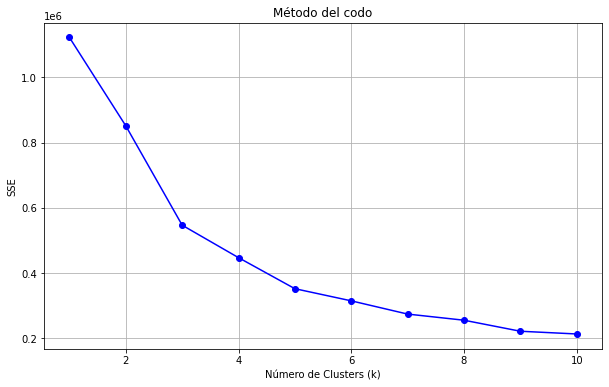

In [24]:
import numpy as np

def kmeans_from_scratch(X, k, max_iter=100):

    # Inicializar centroides de manera aleatoria
    n_samples, n_features = X.shape
    indices = np.random.permutation(n_samples)[:k]
    centroids = X[indices]
    
    for _ in range(max_iter):
        # Calcular las distancias eucladianas entre los puntos y los centroides
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        
        # Asignar puntos a los centroides correspondientes más cercanos
        labels = np.argmin(distances, axis=1)
        
        new_centroids = []
        for i in range(k):
            if np.any(labels == i):  
                new_centroids.append(X[labels == i].mean(axis=0))
            else:  # Si el cluster está vacío, reasignar nuevo centroide
                new_centroids.append(X[np.random.choice(X.shape[0])])
        
        new_centroids = np.array(new_centroids)

        # Revisar que hayu convergencia
        if np.allclose(centroids, new_centroids):
            break
            
        centroids = new_centroids
    
    # Calcular errores
    sse = np.sum((X - centroids[labels])**2)
        
    return centroids, labels, sse

# Calcular el k óptimo utilizando el método del codo
def elbow_method(X, k_max=10):
    sse_values = []
    
    for k in range(1, k_max + 1):
        _, _, sse = kmeans_from_scratch(X, k)
        sse_values.append(sse)
    
    return sse_values

def plot_elbow_method(sse_values):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(sse_values) + 1), sse_values, 'bo-')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('SSE')
    plt.title('Método del codo')
    plt.grid(True)
    plt.show()

# Aplicar el método del codo a dos features seleccionados
X_selected = df_balanced_scaled[['CustAccountBalance', 'TransactionAmount (INR)']].values
sse_values = elbow_method(X_selected, k_max=10)

plot_elbow_method(sse_values)


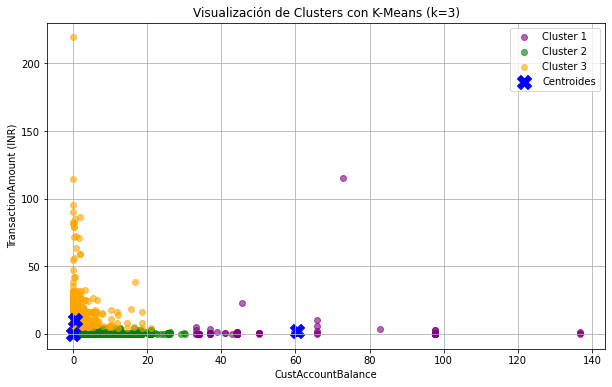

In [ ]:
from sklearn.metrics import silhouette_score

# Definir el número de clusters según el método del codo
k_optimo = 3  

centroids, labels, _ = kmeans_from_scratch(X_selected, k_optimo)

colors = ['purple', 'green', 'orange']

plt.figure(figsize=(10, 6))

for cluster_id in range(k_optimo):
    plt.scatter(
        X_selected[labels == cluster_id, 0],
        X_selected[labels == cluster_id, 1],
        c=colors[cluster_id], 
        label=f'Cluster {cluster_id + 1}', 
        alpha=0.6, 
    )

# Graficar los centroides
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c='blue', marker='X', s=200, label="Centroides"  
)

# Etiquetas y título
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title(f'Visualización de Clusters con K-Means (k={k_optimo})')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

silhouette_avg = silhouette_score(X_selected, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")


##### **K-Means | Uso de librerías**

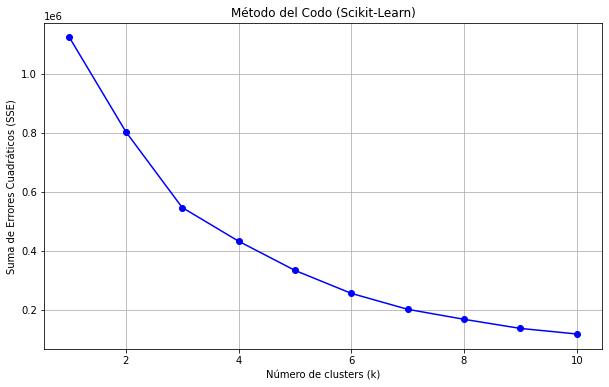

In [ ]:
from sklearn.cluster import KMeans

# Definir el rango de clusters a probar (k=1 a k=10)
k_range = range(1, 11)
sse_values_sklearn = []

# Calcular SSE para cada valor de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_selected)
    sse_values_sklearn.append(kmeans.inertia_)  

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse_values_sklearn, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de Errores Cuadráticos (SSE)')
plt.title('Método del Codo (Scikit-Learn)')
plt.grid(True)
plt.show()


El número de clusters óptimo según la librería de Scikit Learn es de k = 3

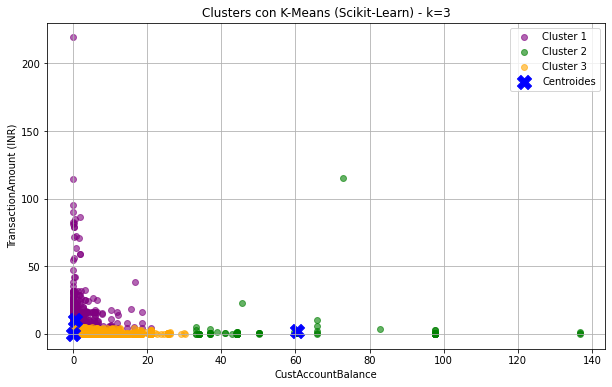

In [ ]:

# Definir el número de clusters basado en el método del codo
k_optimo = 3 

kmeans_sklearn = KMeans(n_clusters=k_optimo, random_state=13, n_init=10)
labels_sklearn = kmeans_sklearn.fit_predict(X_selected)

centroids_sklearn = kmeans_sklearn.cluster_centers_

# Colores para los clusters
colors = ['purple', 'green', 'orange']  

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar cada cluster con su color y etiqueta
for cluster_id in range(k_optimo):
    plt.scatter(
        X_selected[labels_sklearn == cluster_id, 0],
        X_selected[labels_sklearn == cluster_id, 1],
        color = colors[cluster_id],
        label=f'Cluster {cluster_id + 1}', 
        alpha=0.6
    )

# Graficar centroides
plt.scatter(
    centroids_sklearn[:, 0],
    centroids_sklearn[:, 1],
    c='blue', marker='X', s=200, label="Centroides"
)

# Etiquetas y título
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title(f'Clusters con K-Means (Scikit-Learn) - k={k_optimo}')
plt.legend()
plt.grid(True)

# Calcular Silhouette Score 
silhouette_sklearn = silhouette_score(X_selected, labels_sklearn)
print(silhouette_sklearn)


### Task 2.2 - Mixture Modelos y Segmentación de Clientes de Banco

#### Task 2.2.1 - Mixture Models

##### **Gaussian Mixture | Uso de librerías**

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer

# Imputar los valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Definir el modelo de Gaussian Mixture
gmm = GaussianMixture(n_components=5, random_state=42)

# Ajustar el modelo a los datos
gmm.fit(X_imputed)

# Predecir las etiquetas de los clusters
labels = gmm.predict(X_imputed)

# Agregar las etiquetas al DataFrame original
data['Cluster'] = labels

# Visualizar la distribución de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['CustAccountBalance'], data['TransactionAmount (INR)'], c=labels, cmap='viridis')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title('Clusters de Clientes usando Gaussian Mixture Model')
plt.colorbar(label='Cluster')
plt.show()